## 서포트 벡터 머신 ( SVM )

http://bskyvision.com/163

### 5.1 선형 SVM 분류
> #### 5.1.1 소프트 마진분류


### 5.2 비선형 SVM 분류
> #### 5.2.1 다항식 커널
> #### 5.2.2 유사도특성 추가 
> #### 5.2.3 가우시안 RBF 커널
> #### 5.2.4 계산 복잡도

### 5.3 SVM 회귀 
### 5.4 SVM 이론 
> #### 5.4.1 결정 함수와 예측 
> #### 5.4.2 목적 함수
> #### 5.4.3 콰드라틱 프로그래밍
> #### 5.4.4 쌍대 문제
> #### 5.4.5 커널 SVM
> #### 5.4.6 온라인 SVM 

--- 


## 서포트 벡터 머신 
> - 분류, 회귀 ( 선형,비선형 ) ,이상탐치에 활용할 수 잇는 다목적 러신머닝 모델 
> - 복잡한 분류 문제 , 작거나 중간 크기에 데이터셋에 적합 


### 5.1 선형 SVM 분류 

---
<img src="https://drive.google.com/uc?id=1rpe1HWu7eogcrLkffyhpcDfwdegxdQJn">

* SVM 분류기를 클래스 사이에 가장 폭이 넓는 도로를 찾는 것 
> = 라지 마진 분류 ( Large Margin Classification ) 

* 마진
> 두 데이터 군과 결정 경계와 떨어져있는 정도를 의미

* 서포트 벡터 ( Support Vector )
> - 두 클래스 사이의 경계에 위치한 데이터 포인트들
> - 결정경계(실선)는 도로 경계에 위치한 샘플 (서포트 벡터)에 의해 전적으로 결정 
> - 즉, 이 데이터들이 결정 경계를 지지(support)하고 있다고 말할 수 있기 때문에, 서포트벡터라고 불리는 것

<img src="https://drive.google.com/uc?id=1zzPKIYgj3HaiolQkrvrjC2vgbzLZ29fS" width=250>

- SVM은 특성 스케일에 민감 
<img src="https://drive.google.com/uc?id=1g8j8YtPUzJZ7EFF7wVYOj7QQL03zTOe6" >










### 5.1.1 소프트 마진 분류
--- 

* 하드 마진 분류
> * 모든 샘플이 도로 바깥쪽에 올바르게 분류되어 있는 경우 
> * 문제점 
> > 1. 데이터가 선형적으로 구분될 수 있어야 제대로 작동
> > 2. 이상치에 민감 - 일반화가 잘 안됌

<img src="https://drive.google.com/uc?id=1OcoMa4OhWPVy7-TVA-AcZjy7S5Ym-Fpt" > 

---
$$.......$$ 

*그래! 선형적으로 완벽하게 분류하지 못하니, 약간의 오류를 허용하는 전략이 만들자!*

**이 것이 소프트 마진 분류 ( Soft Margin Classification )**
 
1. 도로의 폭을 가능한 넓게 유지하는 것
2. 마진 오류 ( Margin Violation ) 
   > 샘플이 도로 중간이나 반대편에 있는 경우 
- 둘 사이의 적절한 균현을 잡아야함 


- 약간의 오류를 허용하는 전략 = 이것과 관련된 파라미터가 바로 cost(C)

- C값을 낮게 설정
> 1. 이상치들이 있을 가능성을 크게 잡아 일반적인 결정 경계를 찾아냄
> 2. 도로 폭 (= margin)이 넓어짐 
> 3. 마진 오류가 커짐 

- C값을 높게 설정
> 1. 이상치을 모두 잡아서 좀 더 세심하게 결정 경계를 찾아냄 
> 2. 도로 폭 (= margin)이 좁아짐
> 3. 마진 오류가 작아짐 

~~~
e.g) "난 데이터 샘플하나도 잘못 분류할 수 없어!"라면 C를 높임
     "몇개는 놓쳐도 괜찮아, 이상치들이 꽤 있을 수도 있으니까"라면 C를 낮춰야함
~~~

<img src="https://drive.google.com/uc?id=19V2awhw1WAXNNFU-ZZBLMtobnlxgjF0t"> 





In [5]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2,3)] # 꽃잎 길이, 너비
y = (iris["target"] == 2).astype(np.float64) # 버지니카 

svm_clf = Pipeline([
    ("scaler",StandardScaler()),
    ("linear_svc", LinearSVC(C =1, loss="hinge"))
])
svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [8]:
svm_clf.predict([[5.5,1.7]])

array([1.])

* LinearSVC
> - 규제에 편향을 포함시키기 때문에,StandardScaler을 사용하여 데이터 스케일을 맞추는것이 좋음
> - loss는 "hinge" 사용 / default가 "squared_hinge" (=SVC(kernel="linear"))

* SVC
> - SVC(kernel="linear", C=1 ) 
> - 큰 훈련세트에서는 속도가 매우 느리므로 권장하지 않음 

* SGDClassifier
> - 확률적 경사하강볍인만큼, 데이터셋이 아주 커서 적재할 수 없거나,온라인 학습으로 분류 문제를 다룰 때 유용



### 5.2 비선형 SVM 분류

방법론
> 1. 다항 특성 추가 
> 2. 다항식 커널 ( 커널 트릭 )
> 3. 유사도 특성 추가 



1. 다항 특성 추가 
> 선형적으로 구분이 안되는 데이터에 두번째 특성을 추가하여 2차원 데이터셋으로 변경 
>$$ x_2 = (x_1)^2$$
<img src="https://drive.google.com/uc?id=1byR863T5v2gxfaZh2OFvdM2vilkcuctv">

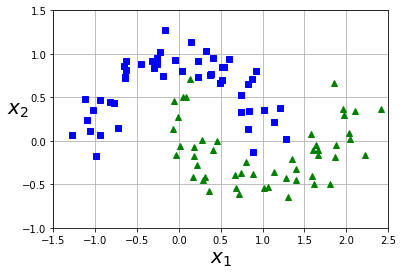

In [16]:
import matplotlib
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [17]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

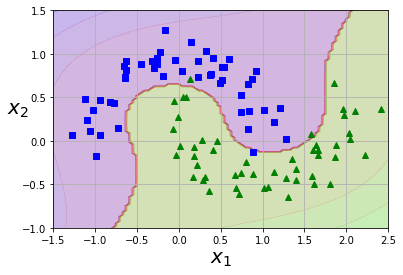

In [18]:

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

### 5.2.1 다항식 커널

- 다항식 특성을 추가하는 것은 간단 하고, 모든 머신러닝 알고리즘에서 잘 작동..
~~~
 - 낮은 차수의 다항식은 매우 복잡한 데이터셋을 잘 표현하지 못하고,
 - 높은 차수의 다항식은 굉장히 많은 특성을 추가해야하므로 모델을 느리게 만든다
~~~

SVM 사용할 땐, 커널트릭 ( Kernel trick ) 이라는 기적에 가까운 수학적 기교를 적용 
- 실제로 특성을 추가하지 않으면서 다항식 특성을 많이 추가한 것과 같은 결과를 얻으 수 있음
- 어떤 특성도 추가하지 않기 때문에 엄청난 수의 특성 조합이 생성되지 않음 


In [20]:
poly3_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5)) # 3차 다항식 커널 사용 
    ])
poly3_kernel_svm_clf.fit(X, y)

# 모델이 과대적합이라면 차수를 줄여야함 
# 모델이 과소적합이라면 차수를 늘려야함 
# coef0 은 모델이 높은 차수와 낮은 차수에 얼마나 영향을받을지 조절 
#  - 차수가 높아질 수 록, 1 보다 작은 값과 1보다큰 값의 차이가 크게 벌어지므로 coef0를 적절한 값을 지정하면 고차항의 영향을 줄임
#  - default coef0 = 0 

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [21]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=100,
  decision_function_shape='ovr', degree=10, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

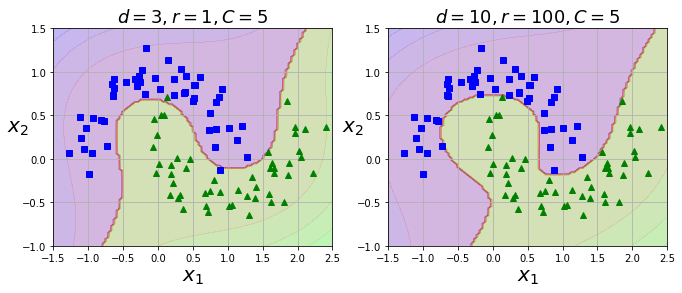

In [22]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly3_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

plt.show()

### 5.2.2 유사도 특성 추가

- 비선형 특성를 다루는 다른 기법은 각 샘플이 특정 랜드마크와 얼마나 닮았는지 측정하는 유사도 함수로 계산한 특성을 추가하는 것
- e.g) 1차원 데이터엣에서 두개의 랜드마크 $x_1=-2$ 와  $x_2=1$ 을 추가 
-      $r=0.3$인 가우시안 방사 기저 함수 ( RBF - Radial Basis Function ) 를 유사도 함수로 정의 

<img src="https://drive.google.com/uc?id=1zp-NJPXX6v5uijAduZHKHkLKEMbTtj14">

### 5.2.3 가우시안 RBF 커널

- 다항 특성 방식 , 유사도 특성 방식 모두, 추가 특성을 모두 계산하려면
 연산 비용이 많이 드는데, 특히 훈련 세트가 많아지면 더 증가
 
- 하지만 커널 트릭을 사용하면, 유사도 특성을 많이 추가하는 것과 같은 비슷한 결과를 실제로 특성을 추가하지 않고 얻을 수 있음



*블로그 발췌* 

#### RBF 커널 

- SVM은 선형 SVM이든 RBF 커널 SVM이든 항상 선형으로 데이터를 분류하는 것이 기본적인 전략
- 커널 기법은 주어진 데이터를 고차원 특징 공간으로 사상
- 고차원 공간에 사상되고 나면 원래의 차원에서는 보이지 않던 선형으로 분류해줄 수 있는 방법이 보임
<img src="https://drive.google.com/uc?id=1Dj9d4MbWb6a8LqnRz55c-GUV2eySkbdo" > 

 - 차원 공간에서는 도저히 선형적으로 분류할 수 없을 것 같았던 데이터 분포가 커널 기법을 사용해서 3차원 공간으로 사상되니 분류가 가능
 - 3차원 공간에서 분류된 것을 다시 2차원 공간으로 매핑해서 보면 아래 그림과 같이 결정 경계가 둥그렇게 보일 것이다
<img src="https://drive.google.com/uc?id=1SlO7oyoF73XTfp4_SlQfKlnfrIRsjxR3" width=200>


RBF 커널
 - gamma라는 하이퍼파라미터 존재 
 - SVM의 기본 매개변수인 C도 있으므로 총 2개의 매개변수를 설정해
 
 gamma의 역할?
  - gamma는 하나의 데이터 샘플이 영향력을 행사하는 거리를 결정
  - gamma는 가우시안 함수의 표준편차와 관련되어 있는데, 클수록 작은 표준편차를 갖는다.
  - 즉, gamma가 클수록 한 데이터 포인터들이 영향력을 행사하는 거리가 길어지는 반면, gamma가 낮을수록 짧아진다. 
  
gamma의 크기에 따른 가우시안 함수의 모양
<img src="https://drive.google.com/uc?id=1GSKsBi7AROat4wkN_M3vDMg1pGAdk0ov" width=400>

gamma와 C의 영향

<img src="https://drive.google.com/uc?id=1NAmNUlCTABjTq2noaN-5eYyp8fhMjUYQ">

 C가 커질수록 이상치의 존재 가능성을 낮게 봄 ( = 모든 이상치 포함 )
 
 C의 영향
 - gamma가 10으로 동일한 첫번째 열을 보자.
 - C=1인 상황에서는 두 개의 이상치를 인정하고 무난하게 결정 경계를 찾음
 - C=100일 때는 하나의 이상치만 인정하면서 조금은 억지스럽게 분류해냈다.
 
 
 gamma의 영향
 - C가 1로 동일하게 세팅되어 있는 첫번째 행을 왼쪽에서부터 오른쪽으로 보자
 - gamma가 점점 커지는데, 결정 경계가 결정 경계 가까이에 있는 데이터 샘플들에 영향을 크게 받기 때문에 점점 더 구불구불해지는 것을 알 수 있다.
 - 즉, gamma 매개변수는 결정 경계의 곡률을 조정한다고 말할 수 있다
 - gamma의 값이 높아짐에 따라 파란색의 공간이 점점 작아짐
 - 위에서 언급한 것과 같이 각각의 데이터 포인터가 영향력을 행사하는 거리가 짧아졌기 때문이다. 
 - 매개변수 C와 마찬가지로 너무 낮으면 과소적합될 가능성이 크고, 너무 높으면 과대적합의 위험이 있다. 
 
 따라서 두 파라미터 모두 적정값을 찾아야하는 것이 우리 사용자들의 숙제이다. 


In [23]:

rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

<img src="https://drive.google.com/uc?id=1vDQhnuxOkIxPKknCeZ2cIX5VUekqZKSq" >

### 5.3 SVM 회귀  

- 선형, 비선형 회귀에도 사용 
- 회귀에 적용하는 방법은 목표를 반대로 하는 것 
> - 일정 마진 오류 안에서 두 클래스간의 도로 폭이 가능한 최대로 되도록 하는 대신,
> - SVM 회귀는 도로 밖의 샘플 안에서 도로 안에 가능한 한 많은 샘플이 들어가도록 학습 
> - 도로폭은 $\epsilon$ 으로 조절 

<img src="https://drive.google.com/uc?id=1F6qKIbUox4bVX2K8bUvcAJ4JmsOjxtO6" >

In [25]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [33]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0)

In [36]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1) # 큰 C = 규제 거의 없음
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1) # 작은 C = 규제 더 많음
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

<img src="https://drive.google.com/uc?id=1l-bx15rQCjmz4jjRjZ-mtEiwQdYn9fIJ">